# Base de dados: Absenteeism at work
###Fonte: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [1]:
# Abrir 'df_transformed.csv'
from google.colab import files
uploaded = files.upload()

Saving df_transformed.csv to df_transformed.csv


In [2]:
import pandas as pd
import io
df_transformed = pd.read_csv(io.StringIO(uploaded['df_transformed.csv'].decode('utf-8')),header=0, sep=',')
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.928571,0.25,0.0,0.633333,0.659574,0.193548,0.194471,0.0,0.0,0.50,1.0,0.0,0.272727,0.578947,0.033333,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.25,0.0,0.000000,0.170213,0.741935,0.194471,1.0,0.0,0.25,1.0,0.0,0.454545,0.631579,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.821429,0.50,0.0,0.225926,0.978723,0.354839,0.194471,0.0,0.0,0.00,1.0,0.0,0.212121,0.631579,0.016667,1.0,0.0,0.0,0.0,0.0,0.0
3,0.250000,0.75,0.0,0.596296,0.000000,0.387097,0.194471,0.0,0.0,0.50,1.0,1.0,0.151515,0.263158,0.033333,1.0,0.0,0.0,0.0,0.0,0.0
4,0.821429,0.75,0.0,0.633333,0.659574,0.193548,0.194471,0.0,0.0,0.50,1.0,0.0,0.272727,0.578947,0.016667,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
# Informações sobre tipos de variáveis
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       740 non-null    float64
 1   1       740 non-null    float64
 2   2       740 non-null    float64
 3   3       740 non-null    float64
 4   4       740 non-null    float64
 5   5       740 non-null    float64
 6   6       740 non-null    float64
 7   7       740 non-null    float64
 8   8       740 non-null    float64
 9   9       740 non-null    float64
 10  10      740 non-null    float64
 11  11      740 non-null    float64
 12  12      740 non-null    float64
 13  13      740 non-null    float64
 14  14      740 non-null    float64
 15  15      740 non-null    float64
 16  16      740 non-null    float64
 17  17      740 non-null    float64
 18  18      740 non-null    float64
 19  19      740 non-null    float64
 20  20      740 non-null    float64
dtypes: float64(21)
memory usage: 121.5 KB


# DENDOGRAMA

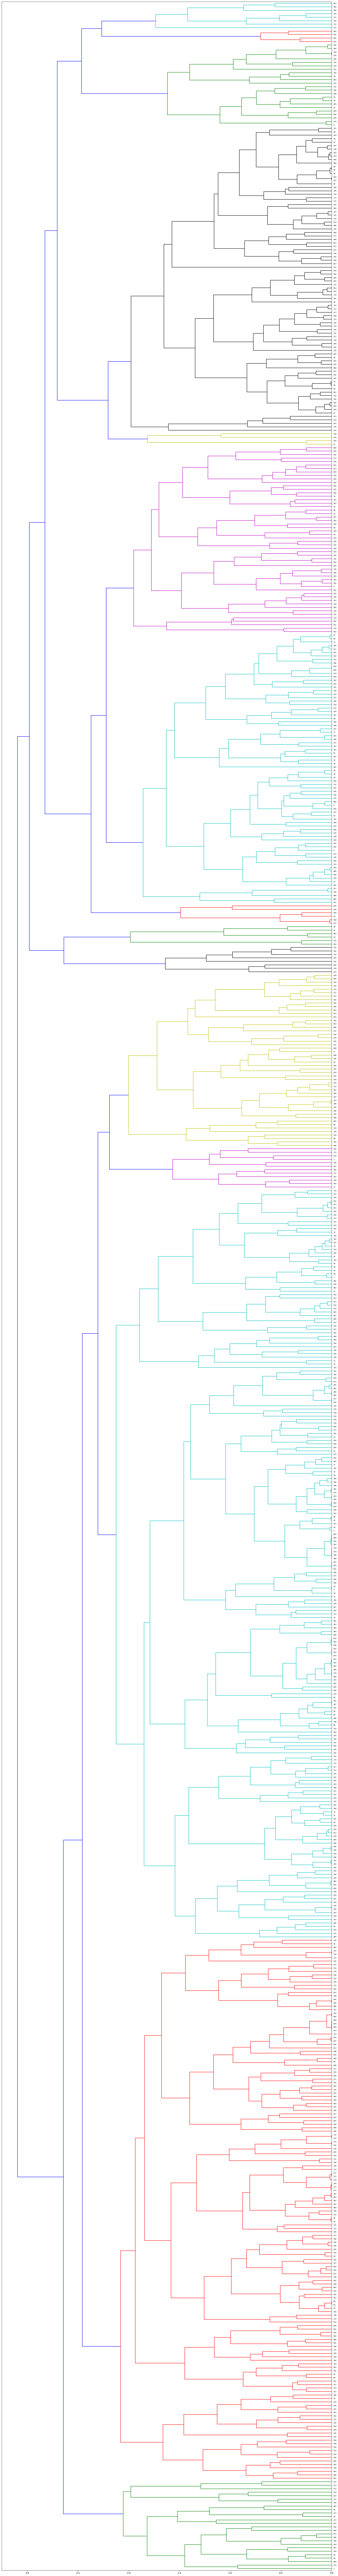

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Definir tamanho da figura
plt.figure(figsize=(25,200))

#Agrupar os dados com linkage
Z = linkage(df_transformed, method='complete', metric='euclidean')   # a medida de distancia pode ser alterada. 

# Plotar dendrograma 
dn = dendrogram(Z,orientation = 'left', leaf_rotation=0, leaf_font_size=7)
plt.show()

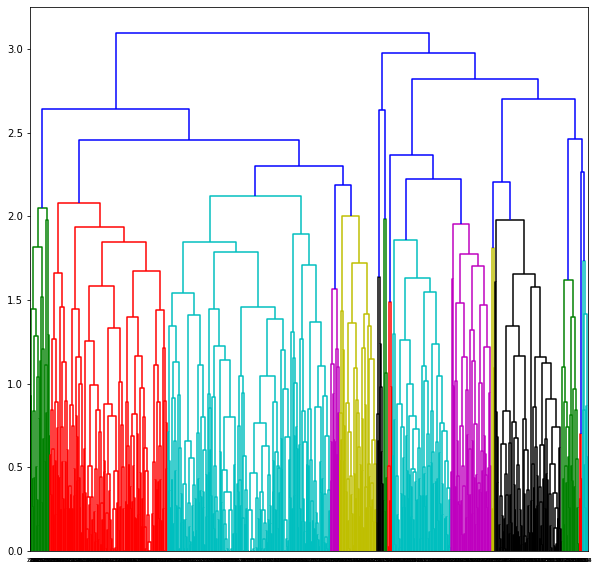

In [5]:
# Plotar dendrograma - tamanho 10x10 - top
plt.figure(figsize=(10,10))
dn = dendrogram(Z,orientation = 'top', leaf_rotation=0)
plt.show()

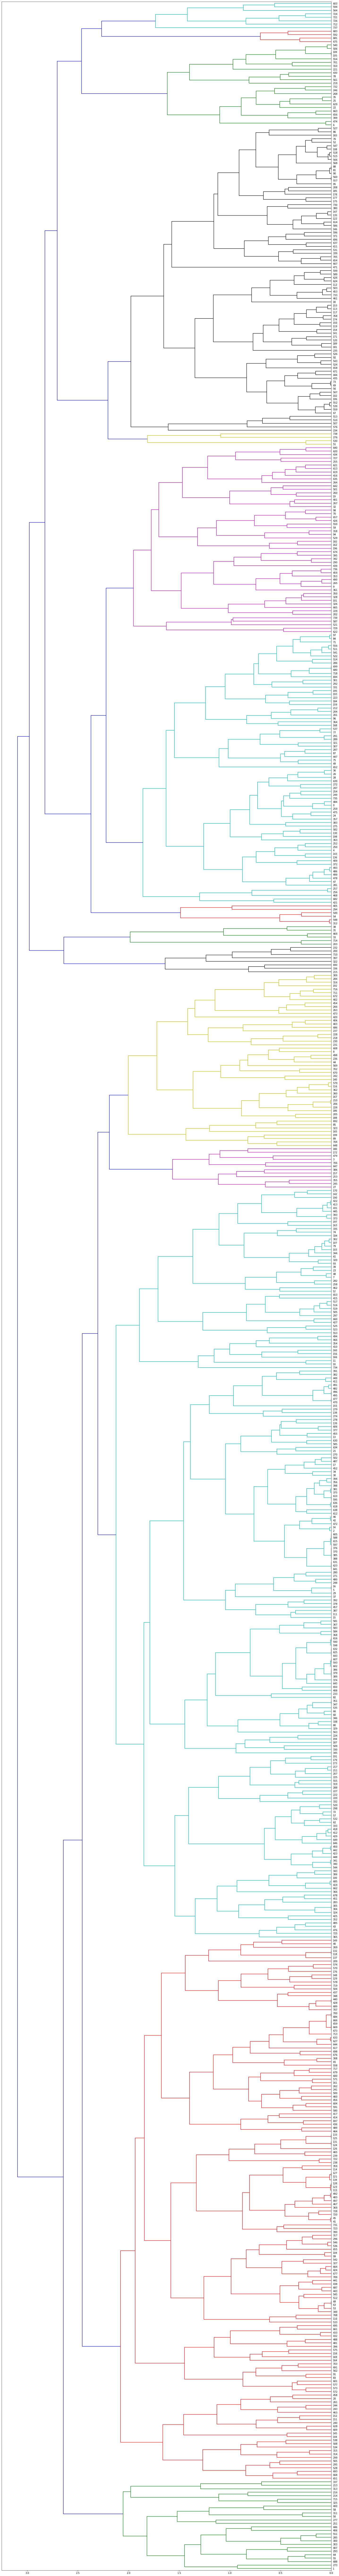

In [6]:
# Plotar dendrograma - tamanho 25x200 - left
plt.figure(figsize=(25,200))
dn = dendrogram(Z,orientation = 'left', leaf_rotation=0, leaf_font_size=10)
plt.show()

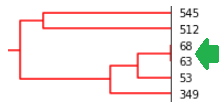

In [7]:
# Acessando na base inicial duas instâncias com características muito semelhantes (distância pequena - vide dendograma)
df_transformed.filter(items = [548,312], axis=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
548,0.0,0.25,1.0,0.640741,0.553191,0.419355,0.361930,1.0,0.0,0.25,1.0,0.0,0.242424,0.315789,0.0,0.0,1.0,0.0,0.0,0.0,0.0
312,0.0,0.25,1.0,0.640741,0.553191,0.419355,0.341684,1.0,0.0,0.25,1.0,0.0,0.242424,0.315789,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
uploaded = files.upload()
ds = pd.read_csv(io.StringIO(uploaded['Absenteeism_at_work.csv'].decode('utf-8')),header=0, sep=';')
ds.filter(items = [548,312], axis=0)

Saving Absenteeism_at_work.csv to Absenteeism_at_work.csv


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
548,15,0,11,3,4,291,31,12,40,268.519,93,1,1,1,1,0,1,73,171,25,0
312,15,0,10,3,4,291,31,12,40,265.017,88,1,1,1,1,0,1,73,171,25,0


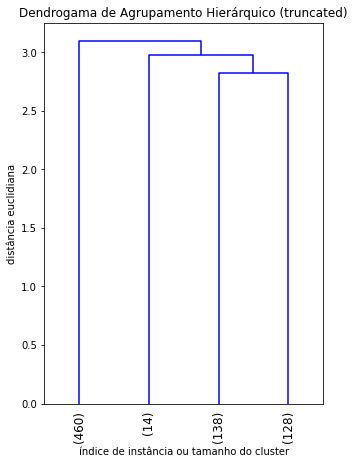

In [11]:
# Definição da figura
plt.figure(figsize=(5,7))
plt.title('Dendrogama de Agrupamento Hierárquico (truncated)')
plt.xlabel('índice de instância ou tamanho do cluster')
plt.ylabel('distância euclidiana')

#Agrupar os dados com linkage
Z = linkage(df_transformed, method='complete', metric='euclidean')   # a medida de distancia pode ser alterada. Por exemplo: 'cosine'

# Plotar dendrograma 
dendrogram(Z, orientation = 'top',truncate_mode='lastp', p=4, leaf_rotation=90, leaf_font_size=12)
plt.show()